<a href="https://colab.research.google.com/github/coding-with-biju/IIoT/blob/main/OpenCV_count-number-of-persons-in-a-video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 13.2 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the YOLOv8 Nano model (pre-trained on COCO dataset)
model = YOLO('yolov8n.pt')
print("Model loaded successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.4MB/s]

Model loaded successfully!


In [7]:
from google.colab import files

uploaded = files.upload()  # Upload a video file
video_path = list(uploaded.keys())[0]  # Get the uploaded file name
print(f"Uploaded video: {video_path}")


Saving WIN_20241205_19_38_35_Pro.mp4 to WIN_20241205_19_38_35_Pro.mp4
Uploaded video: WIN_20241205_19_38_35_Pro.mp4



0: 384x640 1 person, 1 laptop, 151.2ms
Speed: 2.9ms preprocess, 151.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 155.8ms
Speed: 3.1ms preprocess, 155.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 152.7ms
Speed: 2.8ms preprocess, 152.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 cat, 151.6ms
Speed: 2.8ms preprocess, 151.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 laptop, 154.9ms
Speed: 2.8ms preprocess, 154.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 158.1ms
Speed: 2.8ms preprocess, 158.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 laptop, 143.7ms
Speed: 5.4ms preprocess, 143.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 laptop, 171.5ms
Speed: 2.8ms preprocess, 17

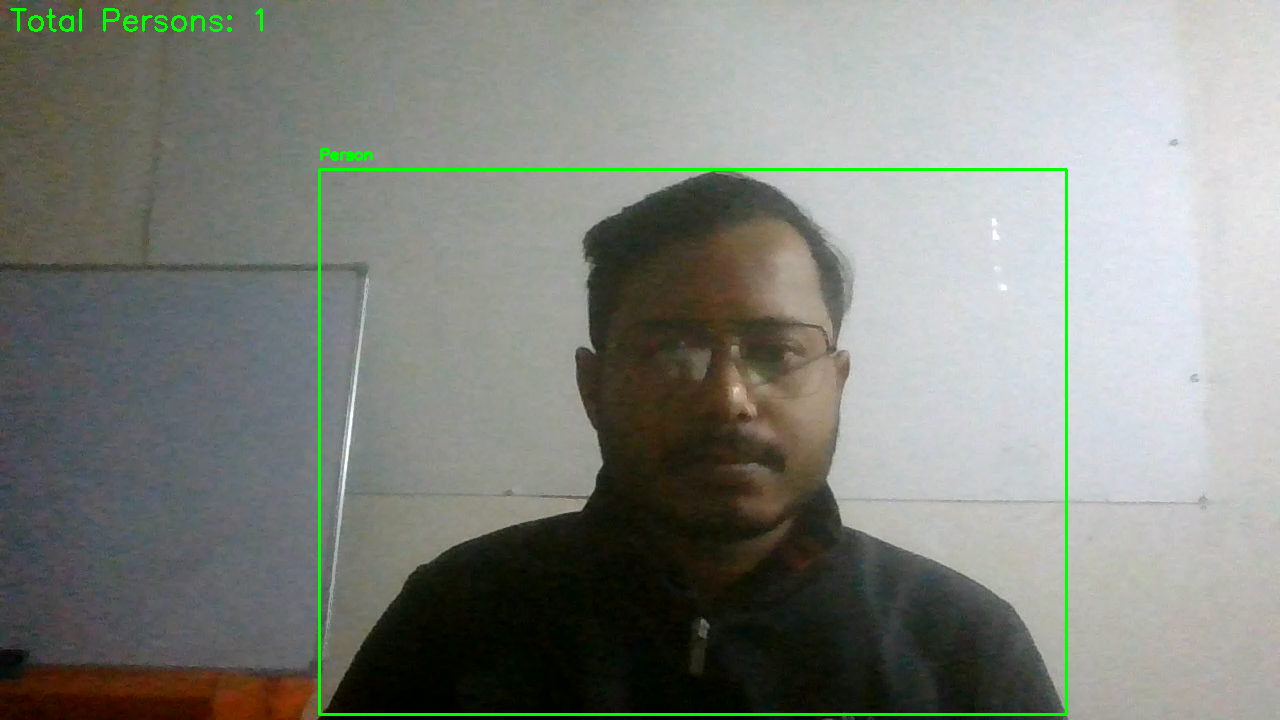


0: 384x640 1 person, 1 laptop, 261.4ms
Speed: 11.2ms preprocess, 261.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



KeyboardInterrupt: 

In [11]:
# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)
    frame_count += 1

    # Extract bounding boxes and labels
    detections = results[0]
    person_count = 0
    for box in detections.boxes:
        cls = int(box.cls)
        label = detections.names[cls]
        if label == 'person':  # Check if the object is a person
            person_count += 1
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Fixed line
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"Person", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the person count
    cv2.putText(frame, f"Total Persons: {person_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame (Google Colab specific)
    if frame_count % 10 == 0:  # Reduce the number of frames displayed to save resources
        cv2_imshow(frame)

cap.release()
cv2.destroyAllWindows()
